In [1]:
#Analysing Web Traffic to Toronto’s Open Data Portal

#Objective
#So,the topic of this project was to explore and visualize web traffic data from the Toronto Open Data portal.
#Using tools, we'll track user sessions, page views, bounce rates, average session duration to better understand traffic
#growth over time, identify high performing pages, and chapters of interest.

#Key Metrics:
#Sessions
#Users
#Page Views
#Bounce Rate
#Avg Session Duration
#Views per Session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = pd.read_csv("Page Views and Time Based Metrics.csv")
df.head()

,_id,Link Source -Page URL,Sessions,Users,Views,Avg Session Duration (Sec),Views per Session,Bounce Rate %,Month
0,1,open.toronto.ca/,11486,10064,13370,364.959749,1.164026,0.597684,202301
1,2,open.toronto.ca/catalogue/,5539,3727,9939,400.314230,1.794367,0.067521,202301
2,3,open.toronto.ca/dataset/3d-massing/,802,577,1000,330.056537,1.246883,0.294264,202301
3,4,open.toronto.ca/dataset/neighbourhood-profiles/,520,399,729,850.636066,1.401923,0.413462,202301
4,5,open.toronto.ca/dataset/outbreaks-in-toronto-h...,470,288,563,542.862069,1.197872,0.691489,202301


In [16]:
print ("Shape of dataset:",df.shape)
print ("Columns:",df.columns.tolist())

Shape of dataset: (17114, 9)
Columns: ['_id', 'Link Source -Page URL', 'Sessions', 'Users', 'Views', 'Avg Session Duration (Sec)', 'Views per Session', 'Bounce Rate %', 'Month']


In [17]:
df.describe(include='all')

,_id,Link Source -Page URL,Sessions,Users,Views,Avg Session Duration (Sec),Views per Session,Bounce Rate %,Month
count,17114.000000,17114,17114.000000,17114.000000,17114.000000,17114.000000,17114.000000,17114.000000,17114.000000
unique,NaN,2495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,open.toronto.ca/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8557.500000,NaN,60.596821,48.968447,76.443263,1125.227710,1.130464,0.156308,202372.357485
std,4940.530589,NaN,547.099407,455.165455,718.578040,951.171672,0.260683,0.252312,67.401543
min,1.000000,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,202301.000000
25%,4279.250000,NaN,2.000000,2.000000,2.000000,452.110104,1.000000,0.000000,202307.000000
50%,8557.500000,NaN,9.000000,8.000000,10.000000,1011.657143,1.062500,0.027778,202402.000000
75%,12835.750000,NaN,28.000000,24.000000,32.000000,1547.772619,1.170521,0.206897,202409.000000


In [19]:
df.isnull().sum()

_id                           0
Link Source -Page URL         0
Sessions                      0
Users                         0
Views                         0
Avg Session Duration (Sec)    0
Views per Session             0
Bounce Rate %                 0
Month                         0
dtype: int64

In [22]:
df['Month']=pd.to_datetime(df['Month'],format = '%Y%m')
df['Month'].head()
                    

0   2023-01-01
1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: Month, dtype: datetime64[ns]

In [4]:
duplicates= df.duplicated().sum()
print("Number of duplicated rows:",duplicates)

Number of duplicated rows: 0


In [6]:
df.dtypes

_id                             int64
Link Source -Page URL          object
Sessions                        int64
Users                           int64
Views                           int64
Avg Session Duration (Sec)    float64
Views per Session             float64
Bounce Rate %                 float64
Month                           int64
dtype: object

In [8]:
df=df[df['Sessions']>=2]

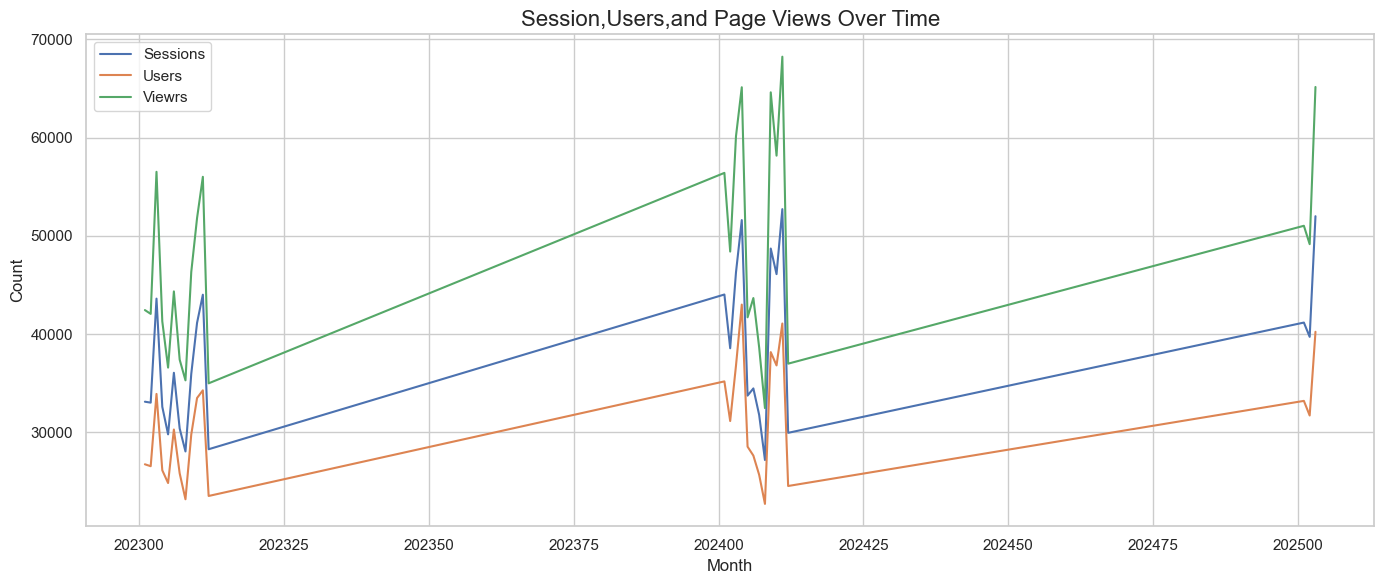

In [10]:
monthly_metrics=df.groupby('Month')[['Sessions','Users','Views']].sum().reset_index()
plt.figure(figsize=(14,6))
plt.plot(monthly_metrics['Month'],monthly_metrics['Sessions'],label='Sessions')
plt.plot(monthly_metrics['Month'],monthly_metrics['Users'],label='Users')
plt.plot(monthly_metrics['Month'],monthly_metrics['Views'],label='Viewrs')
plt.title('Session,Users,and Page Views Over Time',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
top_pages = df.groupby('Link Source -Page URL')['Views'].sum().sort_values(ascending=False).head(10)

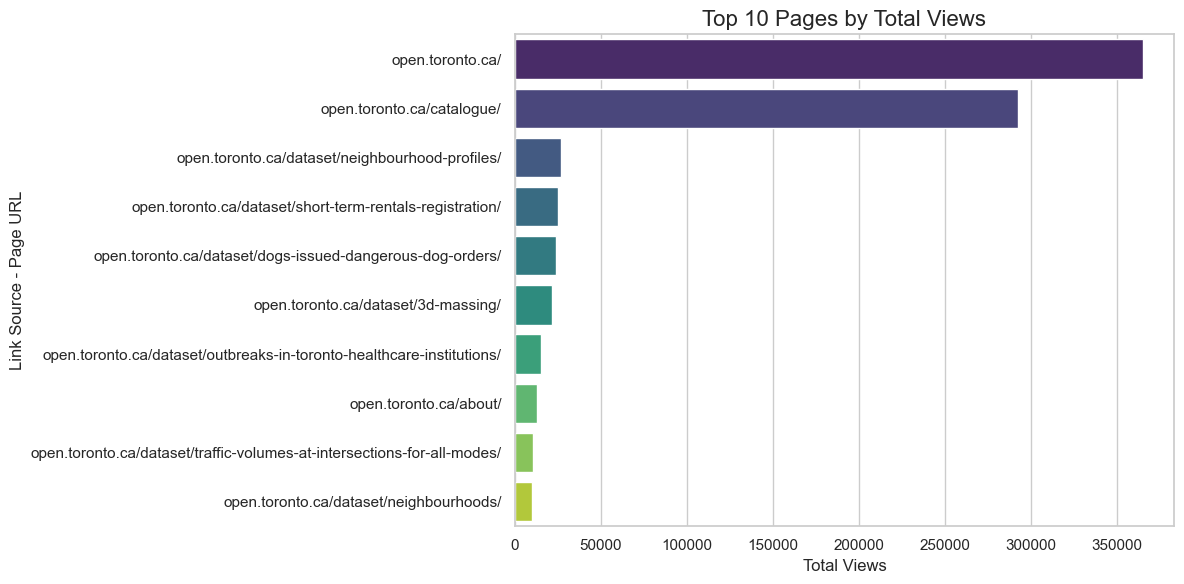

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_pages_df,
    x='Views',
    y='Link Source -Page URL',
    hue='Link Source -Page URL',     
    dodge=False,                      
    palette='viridis',
    legend=False                      
)
plt.title('Top 10 Pages by Total Views', fontsize=16)
plt.xlabel('Total Views')
plt.ylabel('Link Source - Page URL')
plt.tight_layout()
plt.show()


In [16]:
print(df.columns.tolist())


['_id', 'Link Source -Page URL', 'Sessions', 'Users', 'Views', 'Avg Session Duration (Sec)', 'Views per Session', 'Bounce Rate %', 'Month']


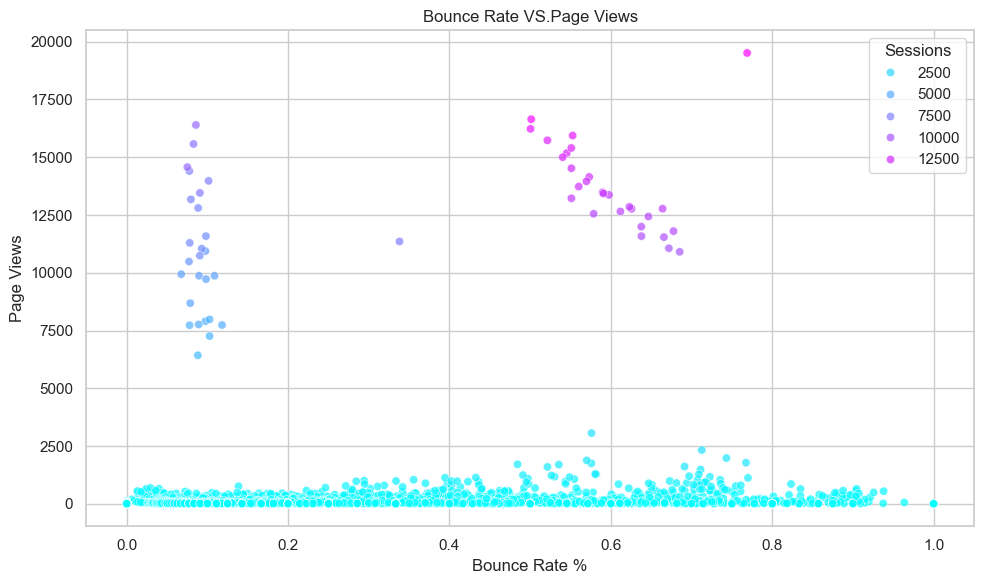

In [20]:
plt.figure(figsize=(10,6))4e
sns.scatterplot(data=df,x='Bounce Rate %' , y='Views',hue='Sessions',palette='cool',alpha=0.7)
plt.title('Bounce Rate VS.Page Views')
plt.xlabel('Bounce Rate %')
plt.ylabel('Page Views')
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# Check data after grouping
avg_duration = df.groupby('Link Source -Page URL')['Avg Session Duration (Sec)'].mean()
print(avg_duration.sort_values(ascending=False).head(10))


Link Source -Page URL
open.toronto.ca/dataset/school-locations-all-types/ point data school locations-all types data.zip/                               7189.0
open.toronto.ca/dataset/street-furniture-transit-shelter/ point data/                                                             7189.0
open.toronto.ca/dataset/registered-residential-nonresidential- condominiums/ point data registered-condominiums-2002-2018.zip/    7189.0
open.toronto.ca/dataset/pedestrian-network/ line data pedestrian-network-2019-wgs84.zip/                                          7189.0
open.toronto.ca/dataset/1c950f43-ff8a-4482-b46d-fc4b22070142/                                                                     7188.0
open.toronto.ca/dataset/members-of-toronto-city-council-voting-record/ http:/app.toronto.ca/tmmis/getadminreport.do/              7188.0
open.toronto.ca/dataset/public-art/nearly/                                                                                        7188.0
open.toronto.ca/dat

C:\Users\User\AppData\Local\Temp\ipykernel_5944\3333078131.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


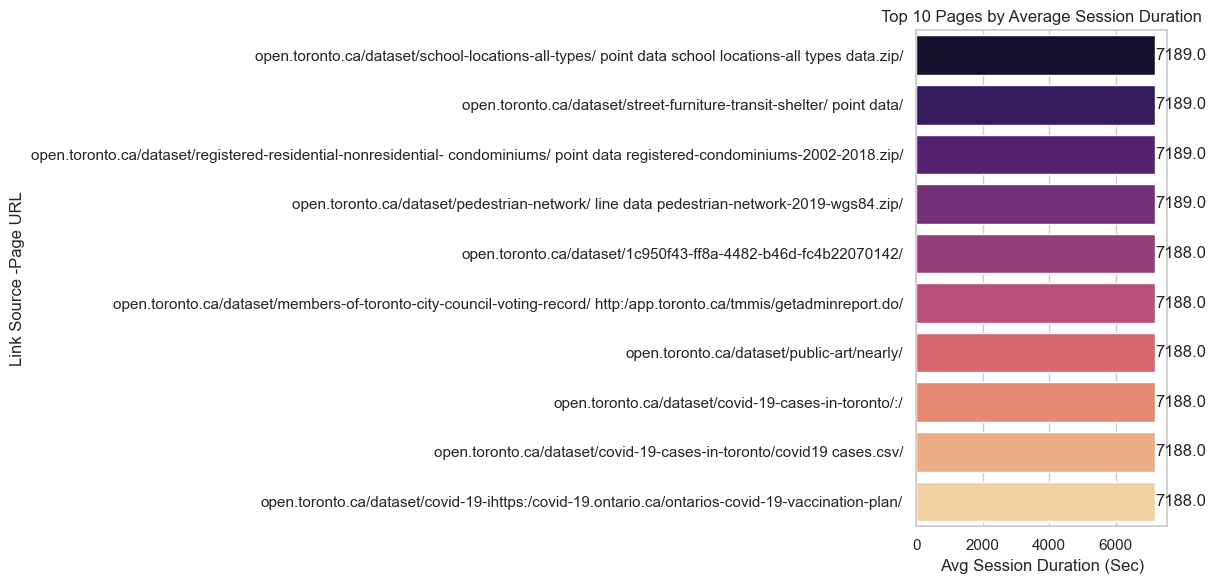

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate average session duration per page and get top 10
avg_duration = df.groupby('Link Source -Page URL')['Avg Session Duration (Sec)'].mean()
avg_duration = avg_duration.sort_values(ascending=False).head(10)

# Step 2: Prepare DataFrame for plotting
avg_duration_df = avg_duration.reset_index()
avg_duration_df.columns = ['Link Source -Page URL', 'Avg Session Duration (Sec)']

# Step 3: Plot using correct setup
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_duration_df,
    x='Avg Session Duration (Sec)',
    y='Link Source -Page URL',
    palette=sns.color_palette('magma', n_colors=10)
)
plt.title('Top 10 Pages by Average Session Duration')
plt.xlabel('Avg Session Duration (Sec)')
plt.ylabel('Link Source -Page URL')

# Optional: Add values on bars for clarity
for index, value in enumerate(avg_duration_df['Avg Session Duration (Sec)']):
    plt.text(value + 1, index, f"{value:.1f}", va='center')

plt.tight_layout()
plt.show()


In [24]:
monthly_metrices = df.groupby('Month')[['Views','Sessions','Users']].sum()
monthly_metrices.head()

,Views,Sessions,Users
Month,,,
202301,42443,33118,26749
202302,42054,33022,26554
202303,56512,43608,33909
202304,41297,32601,26140
202305,36588,29798,24842


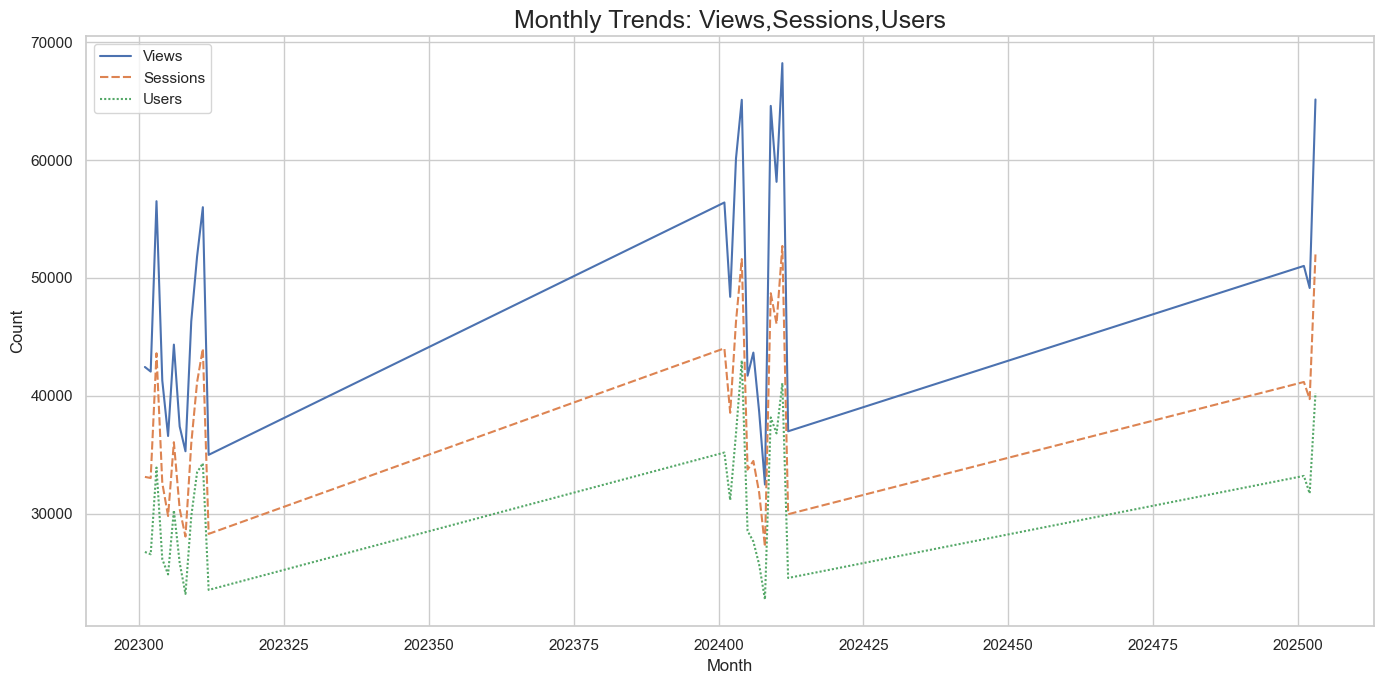

In [26]:
plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_metrices)
plt.title('Monthly Trends: Views,Sessions,Users',fontsize=18)
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
avg_bounce = df['Bounce Rate %'].mean()
avg_views_per_session = df['Views per Session'].mean()  
avg_session_duration= df['Avg Session Duration (Sec)'].mean()
print(f"Average Bounce Rate]:{avg_bounce :.2f}")
print(f"Average views per session:{avg_views_per_session :.2f}")
print(f"Average session duration:{avg_session_duration :.2f}seconds")                                                    

Average Bounce Rate]:0.16
Average views per session:1.13
Average session duration:1125.23seconds


In [11]:
print(df.columns)
print(df[['Link Source -Page URL', 'Bounce Rate %']].head())
print(df['Bounce Rate %'].dtype)


Index(['_id', 'Link Source -Page URL', 'Sessions', 'Users', 'Views',
       'Avg Session Duration (Sec)', 'Views per Session', 'Bounce Rate %',
       'Month'],
      dtype='object')
                               Link Source -Page URL  Bounce Rate %
0                                   open.toronto.ca/       0.597684
1                         open.toronto.ca/catalogue/       0.067521
2                open.toronto.ca/dataset/3d-massing/       0.294264
3    open.toronto.ca/dataset/neighbourhood-profiles/       0.413462
4  open.toronto.ca/dataset/outbreaks-in-toronto-h...       0.691489
float64


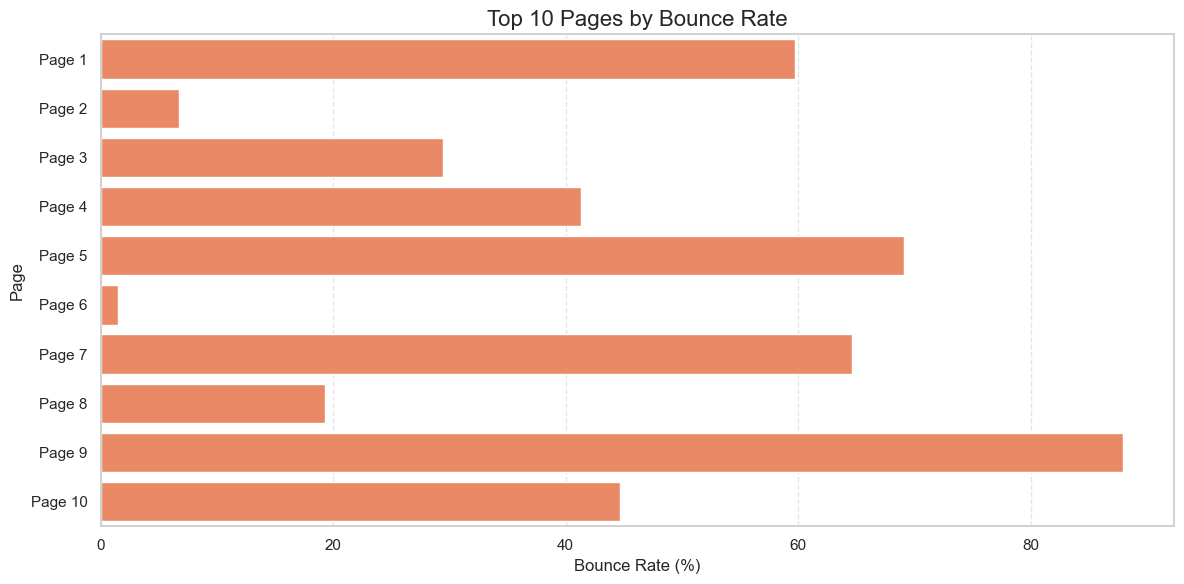

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
top_bounce = pd.Series(
    [0.597684, 0.067521, 0.294264, 0.413462, 0.691489,
     0.014888, 0.646597, 0.192612, 0.879365, 0.446640],
    name="Bounce Rate %"
)

labels = [f"Page {i+1}" for i in range(len(top_bounce))]
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_bounce.values * 100,   
    y=labels,
    color="coral"               
)
plt.title("Top 10 Pages by Bounce Rate", fontsize=16)
plt.xlabel("Bounce Rate (%)", fontsize=12)
plt.ylabel("Page", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


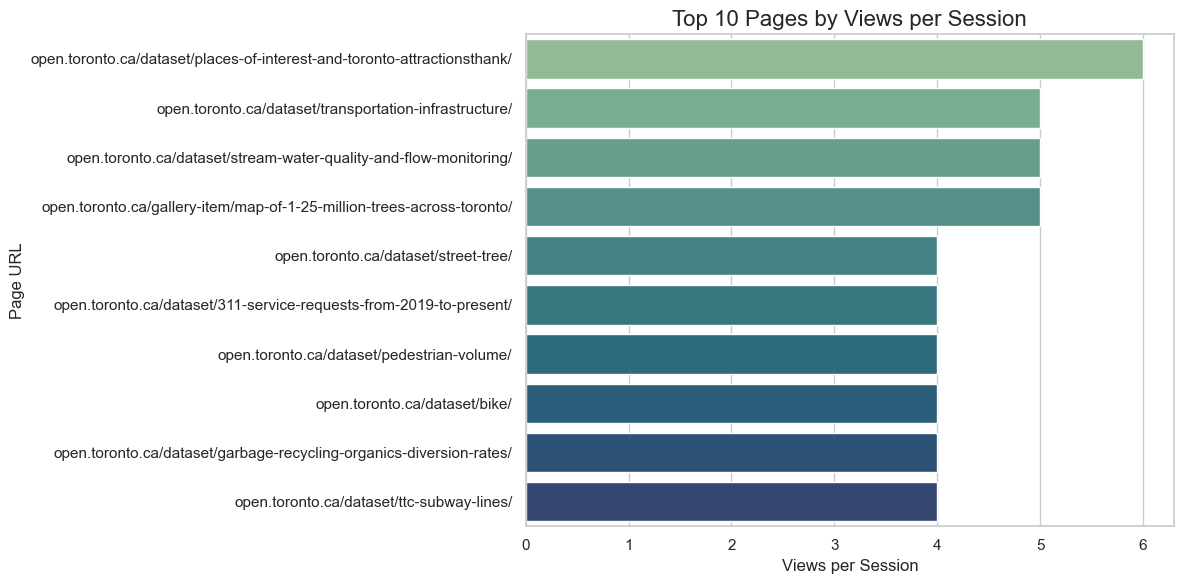

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group and get top 10
vps_by_url = df.groupby('Link Source -Page URL')['Views per Session'].mean().sort_values(ascending=False).head(10)

# Step 2: Reset index for plotting
vps_df = vps_by_url.reset_index()
vps_df.columns = ['Link Source -Page URL', 'Views per Session']

# Step 3: Plot using hue for palette (no legend)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=vps_df,
    x='Views per Session',
    y='Link Source -Page URL',
    hue='Link Source -Page URL',          # Assign hue to match y
    palette='crest',
    dodge=False,                          # Avoid offsetting bars
    legend=False                          # Hide redundant legend
)
plt.title('Top 10 Pages by Views per Session', fontsize=16)
plt.xlabel('Views per Session')
plt.ylabel('Page URL')
plt.tight_layout()
plt.show()


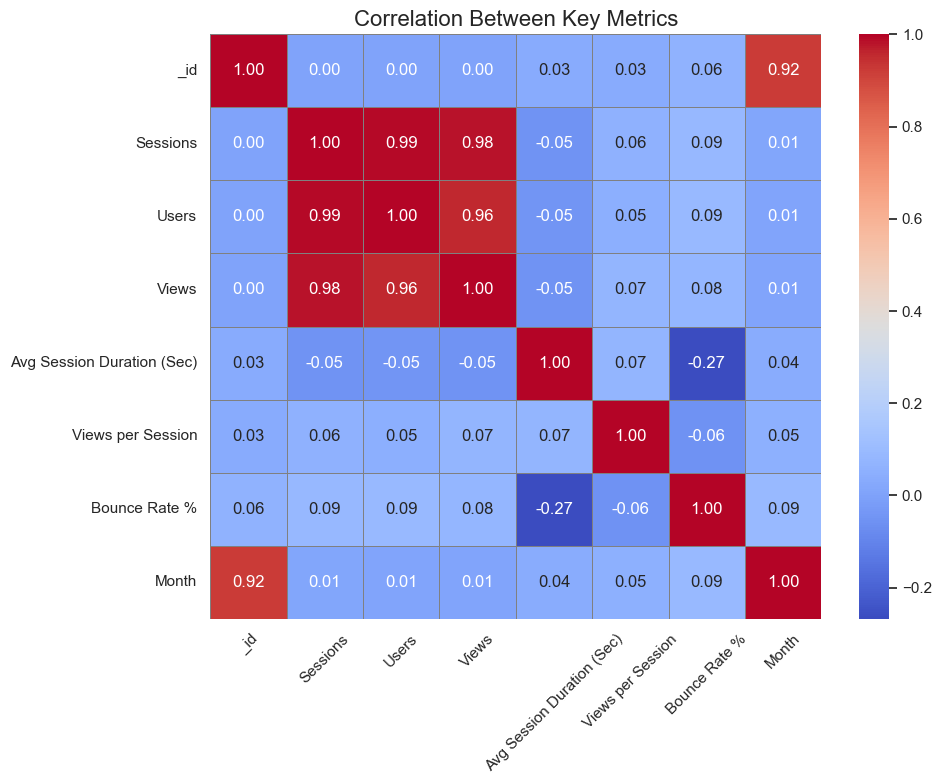

In [2]:
numeric_cols=df.select_dtypes(include ='number')
correlation_matrix=numeric_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='grey'
)
plt.title('Correlation Between Key Metrics', fontsize=16)
plt.xticks(rotation =45)
plt.yticks(rotation =0)
plt.tight_layout()
plt.show()